In [42]:
###In this notebook, we will run a Basic linear regression model to predict "engagement" based on the features of the dataset.
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style
set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [43]:
###Loading the dataset
#The dataset is in the same directory as this notebook
df = pd.read_csv("all_features_final.csv")
# Rename the column 'skills/teach' to 'skills_teach' in the training dataset
df = df.rename(columns={"skills/teach": "skills_teach"})


In [44]:
##Create target variable "engagement"
df["engagement"] = (df["likes"] + df["commentsCount"])  / (df["viewCount"] + 1) # +1 to avoid division by zero


In [51]:
###Defining the predicting features to be included in the model
# Define feature sets
all_features = ["popular_brand", "has_any_affiliate", "product", "budget", "self_ref", "acronym", "korean", "speed", "skills_teach", "skincare", "comparing_products", "prime_hour", "hashtags", "hasAdinTitle", "hasAdinText"]

In [46]:
##Setup the features and target variable
## run two models, one with the original engagement and one with the log of engagement
X = df[all_features]
y = df["engagement"]

##Split raining/testing data for model, using a 80-20 split.
df_train, df_test = train_test_split(df, shuffle = True, test_size = .2, random_state = 42) #random_state = 42 ensures that the split is reproducible 
df_tt, df_ho = train_test_split(df_train, shuffle = True, test_size = .2, random_state = 42)
X_train = df_tt[all_features]
y_train = df_tt["engagement"]
X_test = df_ho[all_features]
y_test = df_ho["engagement"]

In [47]:
###Fitting the basic linear regression model using the training set and print the summary of the model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Evaluate the model
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (Log Scale): {rmse:.6f}")
print(f"R-squared: {r2:.4f}")

Root Mean Squared Error (Log Scale): 0.036916
R-squared: 0.0134


In [52]:

from scipy import stats

# Coefficients and summary statistics
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df["Effect"] = coef_df["Coefficient"].apply(lambda x: "Positive" if x > 0 else "Negative")
coef_df = coef_df.round(4)
coef_df

,Feature,Coefficient,Effect
3,budget,-0.0120,Negative
9,skincare,-0.0095,Negative
1,has_any_affiliate,0.0080,Positive
0,popular_brand,-0.0079,Negative
2,product,-0.0054,Negative
6,korean,0.0048,Positive
7,speed,-0.0044,Negative
13,hasAdinTitle,0.0037,Positive
10,comparing_products,-0.0036,Negative
14,hasAdinText,-0.0036,Negative


/var/folders/hc/hk_g2yrn5c1b90f6bqlqwy100000gn/T/ipykernel_62177/3937116532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette=["#1f77b4" if x == "Positive" else "#ff7f0e" for x in coef_df["Effect"]])


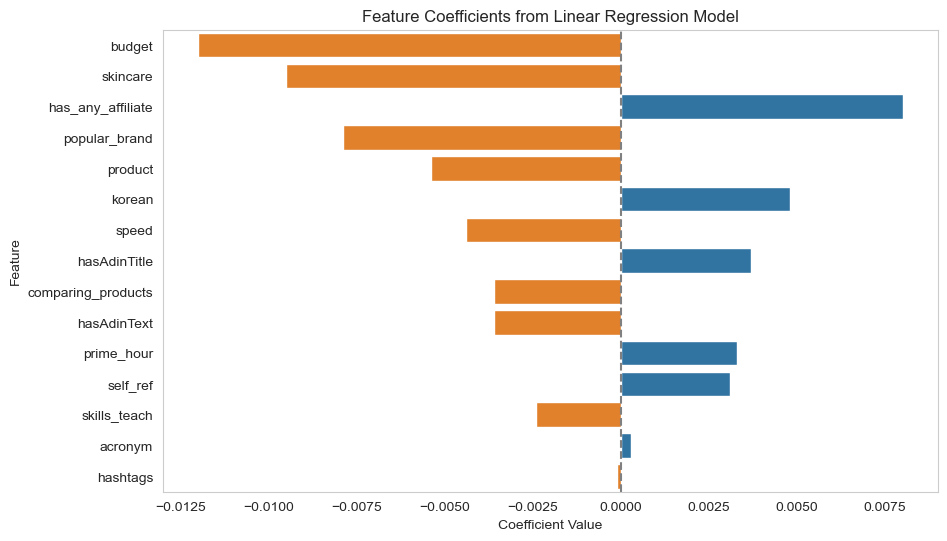

In [53]:
##Create a bar plot to visualize the magnitude and direction of the coefficients for each feature in the model.
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette=["#1f77b4" if x == "Positive" else "#ff7f0e" for x in coef_df["Effect"]])
plt.title("Feature Coefficients from Linear Regression Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis='x')
plt.show()

# Results

## Model performance: 
- Model explains 1% of variance in engagement (R-squared: 0.0134)
